# Machine Learning With Scikit-Learn

In [1]:
# Import libraries 
from sklearn.datasets import load_breast_cancer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 

%matplotlib inline 


## Load the breast cancer data and display the essential information 

In [3]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print(cancer.feature_names)
print()
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

['malignant' 'benign']


In [5]:
print(type(cancer.data))

print(cancer.data)

print(cancer.data.shape)

<class 'numpy.ndarray'>
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


## Process Outline 
### 1. Get the data (pre-process it)
### 2. Pick an algorithm for the classifier 
### 3. Train the data: verify its accurary, and then optimize
### 4. Make prediction 


In [6]:
import pandas as pd 

# Read the "breast-cancer-wisconsin-data.csv" data file, and then display the last 10 records 
raw_data = pd.read_csv("./data_sets/breast-cancer-wisconsin-data.csv", delim_whitespace=',')

raw_data.tail(10)


,"id,""diagnosis"",""radius_mean"",""texture_mean"",""perimeter_mean"",""area_mean"",""smoothness_mean"",""compactness_mean"",""concavity_mean"",""concave","points_mean"",""symmetry_mean"",""fractal_dimension_mean"",""radius_se"",""texture_se"",""perimeter_se"",""area_se"",""smoothness_se"",""compactness_se"",""concavity_se"",""concave","points_se"",""symmetry_se"",""fractal_dimension_se"",""radius_worst"",""texture_worst"",""perimeter_worst"",""area_worst"",""smoothness_worst"",""compactness_worst"",""concavity_worst"",""concave","points_worst"",""symmetry_worst"",""fractal_dimension_worst"","
559,"925291,B,11.51,23.93,74.52,403.5,0.09261,0.102...",NaN,NaN,NaN
560,"925292,B,14.05,27.15,91.38,600.4,0.09929,0.112...",NaN,NaN,NaN
561,"925311,B,11.2,29.37,70.67,386,0.07449,0.03558,...",NaN,NaN,NaN
562,"925622,M,15.22,30.62,103.4,716.9,0.1048,0.2087...",NaN,NaN,NaN
563,"926125,M,20.92,25.09,143,1347,0.1099,0.2236,0....",NaN,NaN,NaN
564,"926424,M,21.56,22.39,142,1479,0.111,0.1159,0.2...",NaN,NaN,NaN
565,"926682,M,20.13,28.25,131.2,1261,0.0978,0.1034,...",NaN,NaN,NaN
566,"926954,M,16.6,28.08,108.3,858.1,0.08455,0.1023...",NaN,NaN,NaN
567,"927241,M,20.6,29.33,140.1,1265,0.1178,0.277,0....",NaN,NaN,NaN
568,"92751,B,7.76,24.54,47.92,181,0.05263,0.04362,0...",NaN,NaN,NaN


## K-Nearest Neighbors (KNN) Algorithm Description: 
####     KNN a supervised Machine Learning algorithm y = f(x) where y is the output and x is the input. KNN is used in the statistical estimation and pattern recognition. It is a simple algorithm that  stores all available cases, classifies and perform regression new cases based on similarity measure (distance). 


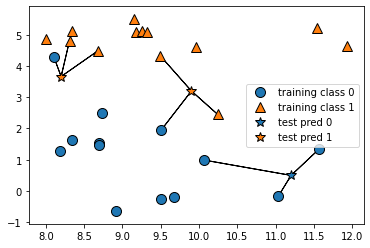

In [7]:
import mglearn

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Accuracy of KNN n-5, on the training set: {:.3f}".format(knn.score(X_train, y_train)))
print()
print("Accuracy of KNN n-5, on the testing set: {:.3f}".format(knn.score(X_test, y_test)))



Accuracy of KNN n-5, on the training set: 0.946

Accuracy of KNN n-5, on the testing set: 0.930


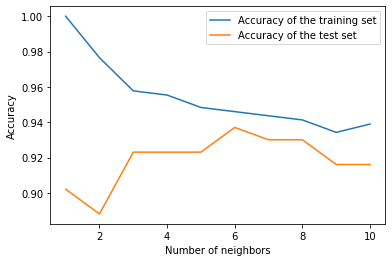

In [9]:
# Increase the randon_state to 66 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Initialize variables 
training_accuracy = []
testing_accuracy = []
neighbors_settings = range(1,11)

# Build the list of training accuracy and testing accuracy data 
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))

# Plot the training accuracy and testing accuracy data 
plt.plot(neighbors_settings, training_accuracy, 
            label="Accuracy of the training set")
plt.plot(neighbors_settings, testing_accuracy, 
            label="Accuracy of the test set")

# Display the x, y labels and legend 
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()


In [10]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Accuracy of KNN n-5, on the training set: {:.3f}".format(knn.score(X_train, y_train)))
print()
print("Accuracy of KNN n-5, on the testing set: {:.3f}".format(knn.score(X_test, y_test)))



Accuracy of KNN n-5, on the training set: 0.946

Accuracy of KNN n-5, on the testing set: 0.930


In [11]:
## Regularization
### - Avoid of overfitting 
### - L1 - assumes only a few important features 
### - L2 - no assumption: L2 is used by default in scikit-learn Logistic Regression
## 'C'
### - parameter to control the strength of regularization 
### - lower C  => log_reg adjust to the majority of data points 
### - higher C => correct classification of each data point 

In [15]:
# Better Classification
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)

print("Accuracy of Logistic Regression on the training set: {:.3f}".format(log_reg100.score(X_train, y_train)))
print()
print("Accuracy of Logistic Regression on the testing set: {:.3f}".format(log_reg100.score(X_test, y_test)))

Accuracy of Logistic Regression on the training set: 0.958

Accuracy of Logistic Regression on the testing set: 0.965


In [16]:
# Poorer Classification 
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)

print("Accuracy of Logistic Regression on the training set: {:.3f}".format(log_reg001.score(X_train, y_train)))
print()
print("Accuracy of Logistic Regression on the testing set: {:.3f}".format(log_reg001.score(X_test, y_test)))

Accuracy of Logistic Regression on the training set: 0.934

Accuracy of Logistic Regression on the testing set: 0.930


## Linear models (in general):
### y = w * x + b 
### where: 
###     x - slope (coefficient) as .coef_
###     b - offset (or intercept) as .intercept_
###     both w & b are learned parameters 
###     y - prediction (decision)
### for example: dataset with one-input features 
###     y = w[0] * x[0] + b 


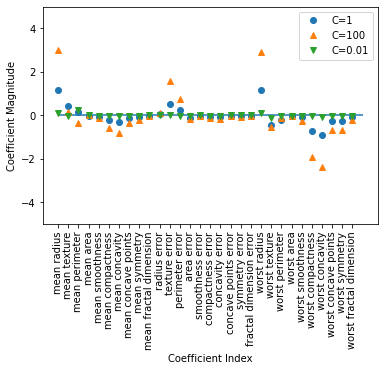

In [24]:
plt.plot(log_reg.coef_.T, 'o', label="C=1")
plt.plot(log_reg100.coef_.T, '^', label="C=100")
plt.plot(log_reg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.legend()

w[0]: 0.393906  b: -0.031804


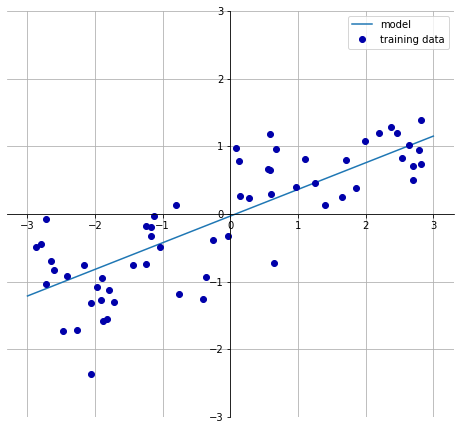

In [18]:
import mglearn 

mglearn.plots.plot_linear_regression_wave()

## DECISION TREE

### Advantages:
<li>Easy to view and understand
<li>No need to pre-process, normalize, scale, and/or standardize features

### Parameters to work with:
<li>max_depth
<li>min=samples_leaf, max_samples_leaf
<li>max_leaf_nodes, etc.

### Main Disadvantages:
<li>tend to overfit
<li>poor generalization

Feature importances: [0. 1.]
Accuracy of the training set: 1.000
Accuracy of the testing set: 0.916


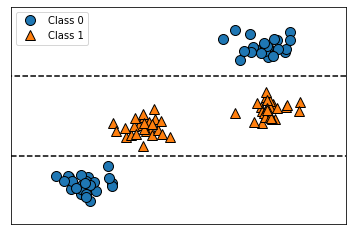

In [1]:
import mglearn 
import matplotlib.pyplot as plt 

%matplotlib inline 

mglearn.plots.plot_tree_not_monotone()
from sklearn.datasets import load_breast_cancer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print("Accuracy of the training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of the testing set: {:.3f}".format(tree.score(X_test, y_test)))

In [2]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy of the training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy of the testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy of the training set: 0.988
Accuracy of the testing set: 0.951


In [4]:
import graphviz 
from sklearn.tree import export_graphviz 

# Save tree data to an external file in graphviz (.dot) format 
export_graphviz(tree, out_file="./data_sets/cancertree.dot",
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True)

In [10]:
print("Feature importances:{}".format(tree.feature_importances_))
print()
print(type(tree.feature_importances_))
print()
print(cancer.feature_names)


Feature importances:[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]

<class 'numpy.ndarray'>

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


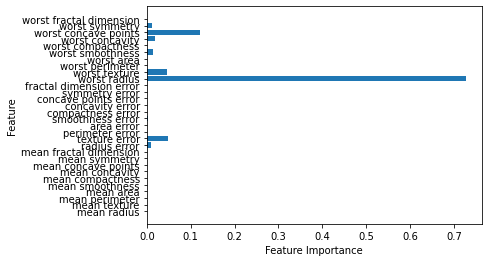

In [12]:
import numpy as np 
n_features = cancer.data.shape[1]

# Plot the tree.feature_importances data 
plt.barh(range(n_features), tree.feature_importances_, align="center")

# Labeling coordinates 
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


## RAIN FORESTS
### Potential Advantages: 
<li> Powerful and widely implemented 
<li> Perform well with default settings 
<li> Don't require scaling of data 
<li> Randomization makes them better than single Decision Tree 

### Parameters to Tune: 
<li> n_jobs: number of cores used to train (-1 for all cores)
<li> n_estimators: number of trees to use (more is better)
<li> max_depth for pre-pruning 
<li> max_features for optimization where sqrt(n_features) for classification or logx(n_features) for regression, etc. 
 

### Potential Disadvantages: 
<li> Not so good performance on very high dimensional & sparse data (text data)
<li> Large datasets requires more resources to train (time, CPUs, etc.)
<li> Can't be visualize as well as Decision Tree
 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy of the training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy of the testing set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy of the training set: 1.000
Accuracy of the testing set: 0.972


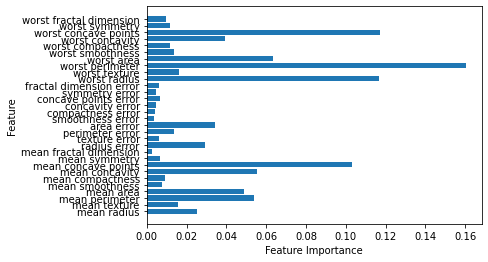

In [2]:
# Plotting the rain forest data 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align="center")

# Labeling coordinates 
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

## DECISION TREE for Linear Models 
### (y = w[0]*x[0] + w[1]*x[1]+ w[2]*x[2]+ w[3]*x[3]+ w[p]*x[p] + b)

### Stronger Points:
<li>Can be used effectively on large datasets 
<li>Can be used to build very complex models 
<li>Many parameters for tuning 
<li>Flexibility and rapid prototype 

### Weaker Points: 
<li>Many parameters for tuning 
<li>Some solvers are scale-sensitive, etc 

### Alternatives: 
<li>Theano 
<li>TensorFlow 
<li>Keras 
<li>Lasagna, etc 

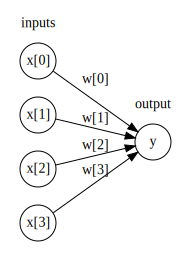

In [3]:
import mglearn 
mglearn.plots.plot_logistic_regression_graph()

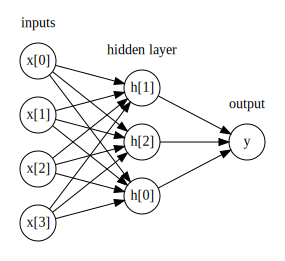

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

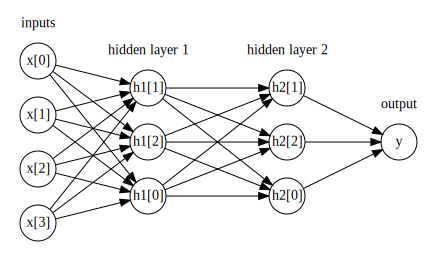

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

### Use Standard MLPClassifier Library for Training and Testing Datasets

In [8]:
# Import libraries 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Standard MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy of the training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy of the testing set: {:.3f}".format(mlp.score(X_test, y_test)))


Accuracy of the training set: 0.939
Accuracy of the testing set: 0.916


In [9]:
print("Maximum per each feature:\n {}".format(cancer.data.max(axis=0)))

Maximum per each feature:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


### Apply StandardScaler to X_train and X_test Data to Improve Accuracy

In [12]:
# Use StandardScaler to improve accuracy 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply standard scaling to X_train and X_test 
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print("Accuracy of the training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy of the testing set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy of the training set: 1.000
Accuracy of the testing set: 0.958


In [16]:
mlp

MLPClassifier(max_iter=1000, random_state=42)

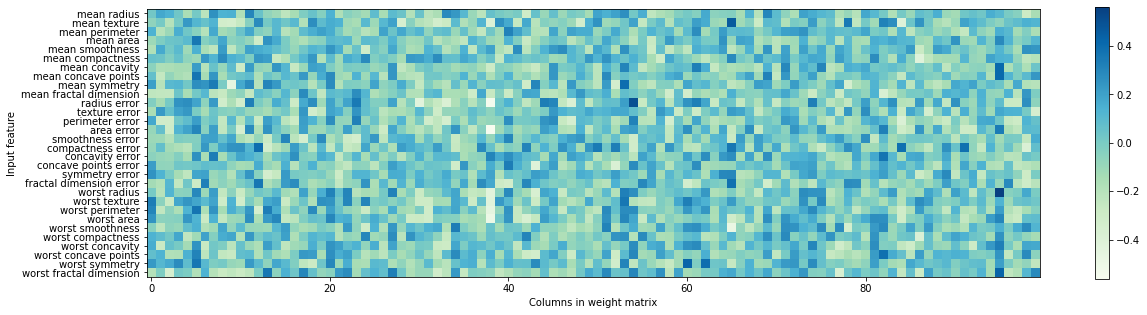

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation="None" ,cmap="GnBu")
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Support Vector Machines (SVM)

### Usages: 

<li>Classification and regression
<li>Apply to both linear and non-linear data 
<li>Look for the best sprt line or decision boundary 
<li>Look for the largest margin 

### Commonly-Used Kernels: 
<li>Linear 
<li>Polynomial
<li>Radial bias functions (RBF) such as Gaussian RBF 
<li>Sigmoid, etc

### Stronger points: 
<li>Versatile (adapt or be adapted to many different functions or activities)
<li>Can build complex decision boundaries on low dimensional data 
<li>Can also work well with high-dimensional data with relatively small sample size 

### Weaker points: 
<li>Perform poorly on high-dimensional data with large sample size (<100k)
<li>Pre-processing may be required which requires knowledge and understanding of tuning hyper-parameters
<li>Harder to inspect and visualize 

### Alternatives: 
<li>Consider using Decision Tree or Rain Forests which require less/no pre-processing of data, easier to understand, inpect, and visualize 

### Good Practices on SVM:
<li>Data scaling
<li>Other pre-processing
<li>Choosing an appropriate kernel 
<li>Tuning hyper-parameters such as C and gamma

In [1]:
# Import libraries 
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split

# Load and split the data into training and testing data 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Standard SVC
svm = SVC()
svm.fit(X_train, y_train)

print("Accuracy of the training subset: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy of the testing subset: {:.3f}".format(svm.score(X_test, y_test)))

# Notice that the overfitting data and poor testing subset 

Accuracy of the training subset: 0.904
Accuracy of the testing subset: 0.937


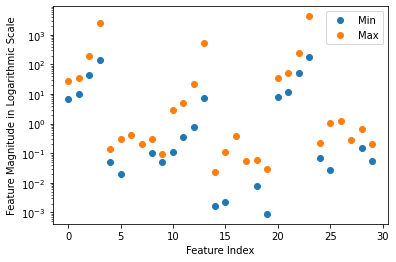

In [2]:
import matplotlib.pyplot as plt 

# Set to inline backend which let the output of plotting to be displayed within the frontends like the Jupyter notebook
%matplotlib inline  

# Plotting X_train min and max data 
plt.plot(X_train.min(axis=0),'o', label="Min")
plt.plot(X_train.max(axis=0),'o', label="Max")
plt.xlabel("Feature Index")
plt.ylabel("Feature Magnitude in Logarithmic Scale")
plt.yscale("log")      # Set yscale to logarithmic scale 
plt.legend(loc="upper right")   # Display the legend on the upper right of plot

In [3]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)
X_train_scaled = (X_train - min_train) / range_train 

# Display the minimum and maximum training data per feature 
print("Minimum per feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum per feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:
# Improve accuracy of testing data 
X_test_scaled = (X_test - min_train) / range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)

print("Accuracy of the training subset: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Accuracy of the testing subset: {:.3f}".format(svm.score(X_test_scaled, y_test)))

Accuracy of the training subset: 0.984
Accuracy of the testing subset: 0.972


In [5]:
# Improve performance further by tuning hyper-parameters on C 
svm = SVC(C=1000)   # default C is 1 
svm.fit(X_train_scaled, y_train)

print("Accuracy of the training subset: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Accuracy of the testing subset: {:.3f}".format(svm.score(X_test_scaled, y_test)))

# Notice: I don't know why the testing subset with C=1000 is worse than with default C=1 

Accuracy of the training subset: 1.000
Accuracy of the testing subset: 0.958


## Uncertainty Estimation 
### Decision Function 


In [7]:
# Display the 1st 20 data points: bening > 0, malignant <=0
print("The decision function is:\n\n:{}".format(svm.decision_function(X_test_scaled)[:20]))

The decision function is:

:[-4.30370364  0.3766659   4.26220675  1.72971445  2.57239644  4.11747879
  6.47824288  2.60295954  3.09610514  5.4378893  -0.02941453  1.48775217
  5.00409641  1.84107875 -0.9106885  -3.92190422  3.56512907 -4.07104411
 -4.09677908 -5.11090211]


In [12]:
# Display threshold decision data - MALIGNANT: False, BENING: True
print("Threshold decision function:\n\n{}".format(svm.decision_function(X_test_scaled[:20])>0))

Threshold decision function:

[False  True  True  True  True  True  True  True  True  True False  True
  True  True False False  True False False False]


### Predicting Probability 
#### If the value in the first column is greater than the one in the second column then it's "MALIGNANT"

In [13]:
svm

SVC(C=1000)

In [18]:
svm = SVC(C=1000, probability=True)
svm.fit(X_train_scaled, y_train)

print("Predicted probabilities for the samples - MALIGNANT and BENIGN:\n\n{}".format(svm.predict_proba(X_test_scaled[:20])))


Predicted probabilities for the samples - MALIGNANT and BENIGN:

[[9.95124958e-01 4.87504164e-03]
 [3.05971226e-01 6.94028774e-01]
 [2.68222175e-03 9.97317778e-01]
 [6.93703007e-02 9.30629699e-01]
 [2.41004591e-02 9.75899541e-01]
 [3.24145673e-03 9.96758543e-01]
 [6.46201301e-08 9.99999935e-01]
 [2.31754587e-02 9.76824541e-01]
 [1.22712261e-02 9.87728774e-01]
 [9.91955330e-07 9.99999008e-01]
 [4.28739701e-01 5.71260299e-01]
 [9.28786453e-02 9.07121355e-01]
 [3.09869434e-06 9.99996901e-01]
 [6.05174884e-02 9.39482512e-01]
 [7.04850954e-01 2.95149046e-01]
 [9.91955386e-01 8.04461428e-03]
 [6.66888617e-03 9.93331114e-01]
 [9.93384777e-01 6.61522331e-03]
 [9.93604383e-01 6.39561695e-03]
 [9.98309774e-01 1.69022618e-03]]


In [17]:
# Display the first 20 data points: MALIGNANT = 0, BENIGN = 1
svm.predict(X_test_scaled[:20])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

### Uncertainty Estimation in Multi Class Datasets

In [1]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)

print("The decision function for the 3-class iris dataset:\n\n{}".format(gbrt.decision_function(X_test[:10])))
print("Predict probability for the samples in the iris dataset:\n\n{}".format(gbrt.predict_proba(X_test[:10])))
 

The decision function for the 3-class iris dataset:

[[-8.07546484  1.67348258 -5.85388448]
 [ 6.23941227 -2.7782434  -6.47551224]
 [-8.05394246 -5.99632927  4.07255522]
 [-8.07546484  2.19760825 -5.2624404 ]
 [-8.1009394   2.44220207 -5.22135883]
 [ 6.23864026 -3.21560212 -6.47551224]
 [-8.07546866  1.7878671  -6.48243413]
 [-8.06389167 -2.77512649  4.02035639]
 [-8.07544566  1.94614868 -4.70053935]
 [-8.07544948  2.64536994 -6.48199365]]
Predict probability for the samples in the iris dataset:

[[5.83212665e-05 9.99403846e-01 5.37832493e-04]
 [9.99875759e-01 1.21234979e-04 3.00555368e-06]
 [5.41387493e-06 4.23758355e-05 9.99952210e-01]
 [3.45299643e-05 9.99390193e-01 5.75277148e-04]
 [2.63606721e-05 9.99504240e-01 4.69399293e-04]
 [9.99918642e-01 7.83500666e-05 3.00800390e-06]
 [5.20324099e-05 9.99692038e-01 2.55929323e-04]
 [5.64143610e-06 1.11756092e-03 9.98876798e-01]
 [4.43704795e-05 9.98659056e-01 1.29657400e-03]
 [2.20775315e-05 9.99869285e-01 1.08637456e-04]]


## Preprocessing Methods:
<li>Binarization
<li>Mean Removal 
<li>Scaling
<li>Normalization, etc 

### 1. Binarization

In [4]:
from sklearn import preprocessing 
import numpy as np 

data = np.array([[2.2, 5.9, -1.8], [5.4,3.2,-5.1], [-1.9,4.2,3.2]])

bin_data = preprocessing.Binarizer(threshold=1.5).transform(data)
bin_data

array([[1., 1., 0.],
       [1., 1., 0.],
       [0., 1., 1.]])

### 2. Mean Removal

In [9]:
print("BEFORE...")
print("Mean = ", data.mean(axis=0))
print("Standard Deviation = ", data.std(axis=0))

BEFORE...
Mean =  [ 1.9         4.43333333 -1.23333333]
Standard Deviation =  [2.98775278 1.11455023 3.41207008]


In [10]:
scaled_data = preprocessing.scale(data)

print("AFTER...")
print("Mean = ", scaled_data.mean(axis=0))
print("Standard Deviation = ", scaled_data.std(axis=0))

AFTER...
Mean =  [0.00000000e+00 1.85037171e-17 7.40148683e-17]
Standard Deviation =  [1. 1. 1.]
